# Вариант 6
# Количество кластеров: 3
# Количество признаков: 4
# Дисперсия: 1.5

А) Выбрать среду программирования для языка Python.
Б) Получить набор данных из 100 наблюдений с параметрами, согласно номеру варианта (таблица 3.1).
С использованием Python провести кластерный и дискриминантный анализ данных. При этом необходимо:
    − получить значения основных показателей описательной статистики и построить диаграммы рассеяния для всех признаков;
    − выполнить стандартизацию данных;
    − построить и вывести на экран дендрограмму;
    − провести кластеризацию данных методом k-средних, вывести на экран результаты кластеризации;
      показать на этих же диаграммах средние значения для каждого кластера;
    − построить диаграмму средних значений для каждого кластера и каждого измерения;
    − создать инструмент для графического отображения результатов дискриминантного анализа – решающих поверхностей и данных;
    − провести линейный дискриминантный анализ данных, для каждой пары признаков:
      вывести на экран решающие поверхности и данные, оценить точность;
    − провести квадратичный дискриминантный анализ данных, для каждой пары признаков:
      вывести на экран решающие поверхности и данные, оценить точность; сравнить с точностью линейного дискриминантного анализа.
Г) Выполнить анализ полученных на каждом этапе результатов и оформить отчет по лабораторной работе.

In [228]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [229]:
N = 3
D = 4

X,y=make_blobs(n_samples=100,centers=N,n_features=D,random_state=None,cluster_std=1.5 ** 0.5)
df=pd.DataFrame(X)
df['Class']=y

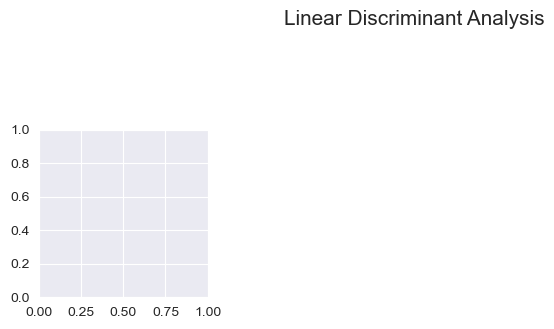

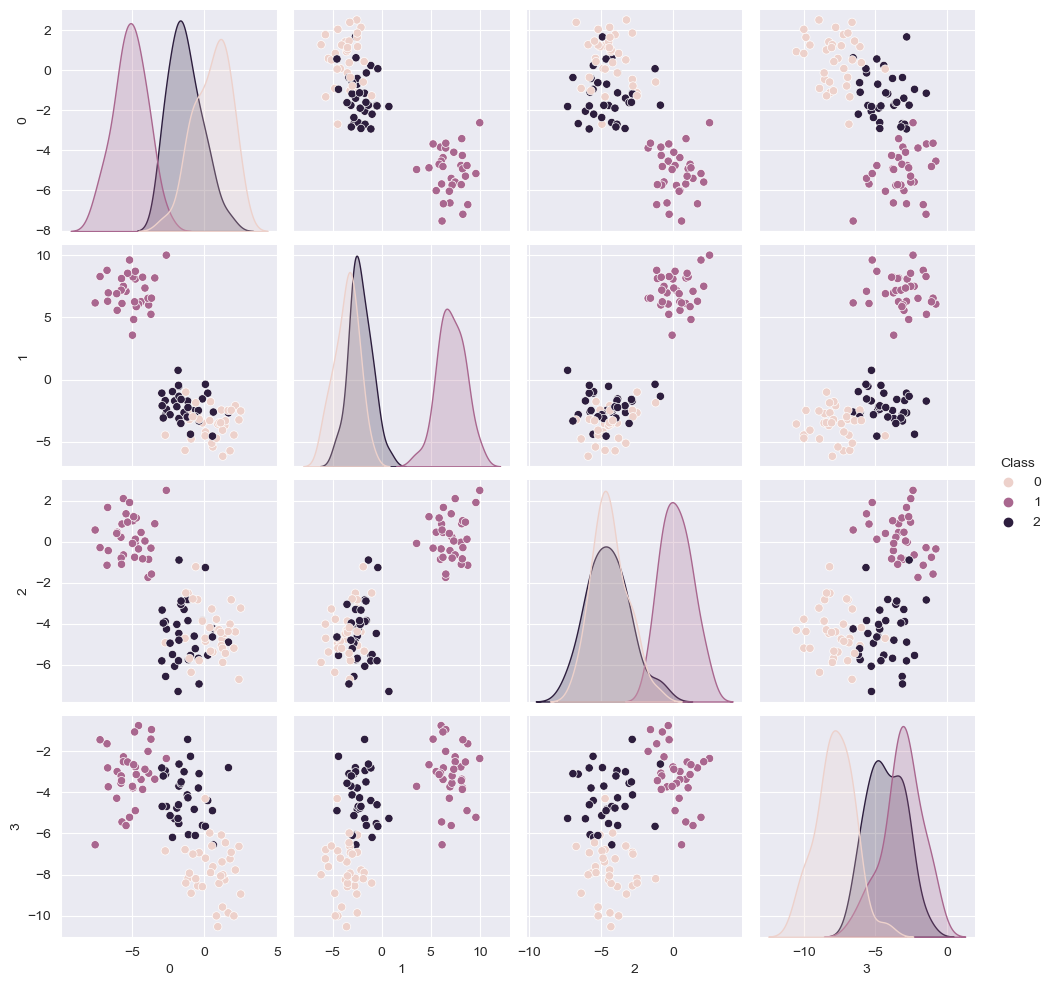

In [230]:
sns.pairplot(df, hue='Class')
plt.show()

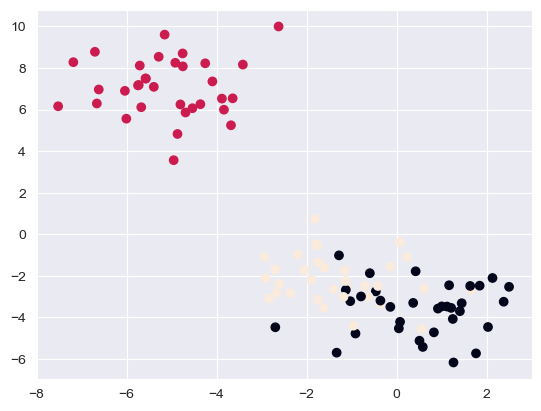

In [231]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [232]:
sc = StandardScaler()
del[df['Class']]
df_t = pd.DataFrame(sc.fit_transform(df))
df_t.describe()

,0,1,2,3
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,3.153727e-16,-2.692291e-17,3.774758e-16,8.244794e-16
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.135608e+00,-1.344938e+00,-1.743813e+00,-2.264332e+00
25%,-8.935360e-01,-7.422239e-01,-7.920012e-01,-7.597939e-01
50%,1.281469e-01,-5.129264e-01,-3.580141e-01,1.255407e-01
75%,7.903324e-01,1.172326e+00,8.654500e-01,8.288183e-01
max,1.703710e+00,1.965350e+00,2.149291e+00,1.809832e+00


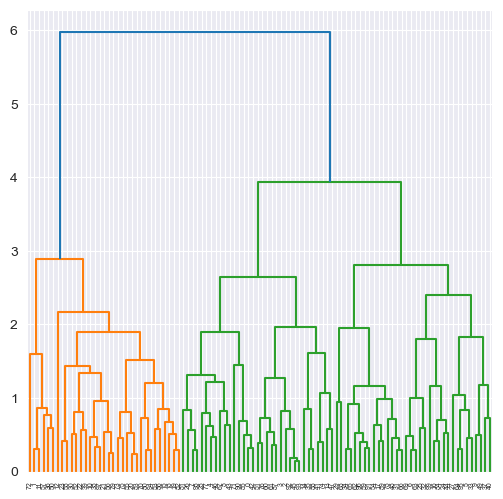

In [233]:
# Выполним иерархическую кластеризацию

row_dist=pdist(df_t,metric='euclidean')
mergings = linkage(row_dist, method='complete')
plt.figure(figsize=(6,6))
dendrogram(mergings)
plt.show()

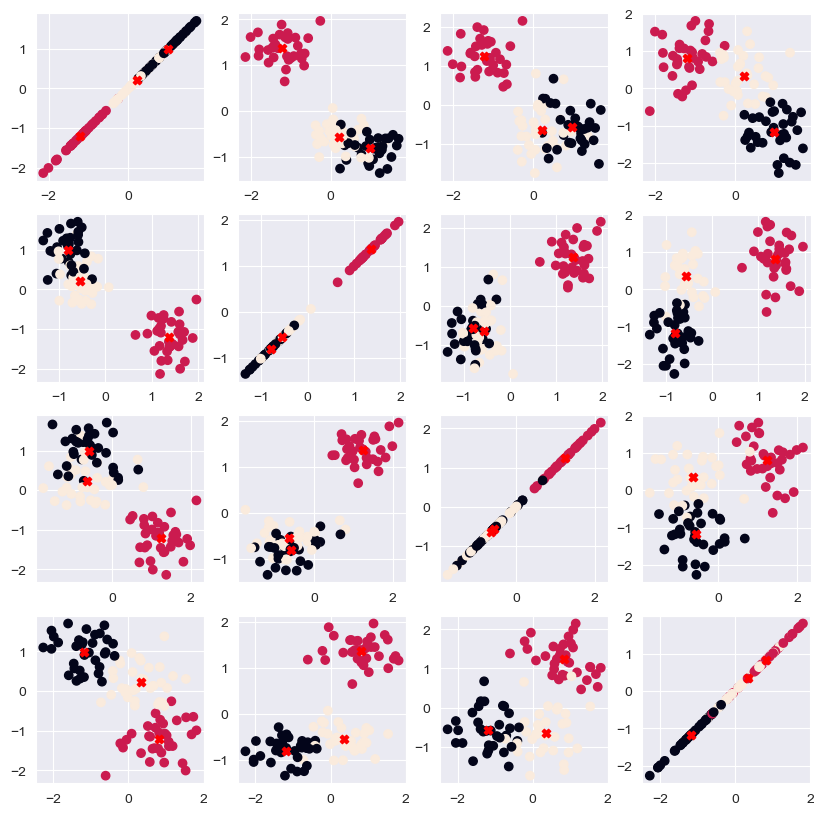

In [234]:
# Выполним кластеризацию методом k-средних, выведем диаграммы рассеяния, нанесем центры кластеров:

model = KMeans(n_clusters=N, max_iter=1000)
model.fit(df_t)
y=model.predict(df_t)
plt.figure(figsize=(10,10))
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        sub=plt.subplot(D,D,k)
        sub.scatter(df_t[i],df_t[j],c=y)
        plt.scatter(model.cluster_centers_[:,i],model.cluster_centers_[:,j],marker='X', c='red')
plt.show()

Данный код пытается выполнить графическое представление данных. Сначала он генерирует 100 точек в 4-мерном пространстве с помощью функции make_blobs() с заданными параметрами. Затем эти данные объединяются в DataFrame, где каждый столбец соответствует одному из признаков точек, а столбец "Class" содержит метки кластеров.

Далее, с использованием метода melt() библиотеки pandas, данные преобразуются в "длинный формат", в котором каждая строка представляет собой одну точку и ее значение в определенном признаке, а столбцы "Class" и "group" используются для идентификации соответствующего кластера и признака соответственно.

Затем с использованием библиотеки seaborn и метода lineplot() строятся линейные графики, показывающие изменение значения каждого признака точек в зависимости от значения другого признака. Каждый график отображает изменение значения одного признака в зависимости от другого признака, а цвет линии соответствует конкретному признаку.

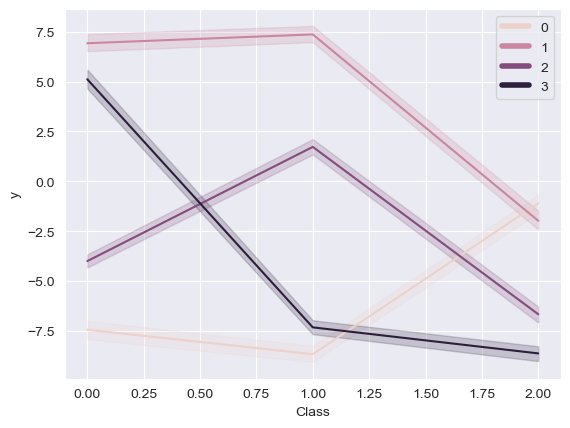

In [235]:
N = 3
D = 4

X,y = make_blobs(n_samples=100, centers=N, n_features=D, random_state=None, cluster_std=1.5 ** 0.5)
df = pd.DataFrame(X)
df['Class'] = y

df = pd.melt(frame=df, id_vars='Class', var_name='group', value_name='y')

g = sns.lineplot(data=df, x='Class', y='y', hue='group')

legend = g.legend()
for legobj in legend.legendHandles:
    legobj.set_linewidth(4)

plt.show()

# Создадим функцию, реализующую инструмент для графического отображения результатов дискриминантного анализа, – решающих поверхностей и отображения данных:

In [236]:
def lda_qda(field1, field2, type_model,k): #процедура рисования "решающих поверхностей"
    splot=plt.subplot(D,D,k)
    x=df_t[[field1, field2]].values #определим данные
    df_t['Class']=y #определим результирующий признак
    #выберем метод анализа: линейный или квадратичный
    model=type_model
    #построим модель
    model.fit(x,y)
    #определим минимальные и максимальные значения в данных для большей информативности диаграмм
    min1, max1 = df_t[field1].min()-1, df_t[field1].max()+1
    min2, max2 = df_t[field2].min()-1, df_t[field2].max()+1
    #определим все строки и столбцы области отрисовки
    X = np.linspace(min1, max1, 200)
    Y = np.linspace(min2, max2, 200)
    X, Y = np.meshgrid(X, Y)
    # #определим значения "решающих поверхностей"
    ZZ = np.array([model.predict(np.array([[xx, yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    Z = ZZ.reshape(X.shape)  #преобразуем значения в вектор
    #отрисуем поверхности и данные
    plt.pcolormesh(X, Y, Z,cmap='Pastel1')
    #Выведем значения
    plt.scatter(df_t[field1],df_t[field2],c=y)
    #оценка точности модели
    plt.title(model.score(x,y))
    return splot


# Проведем линейный дискриминантный анализ данных. Для каждой пары признаков выведем на экран решающие поверхности и данные, для каждой пары признаков оценим точность модели дискриминантного анализа

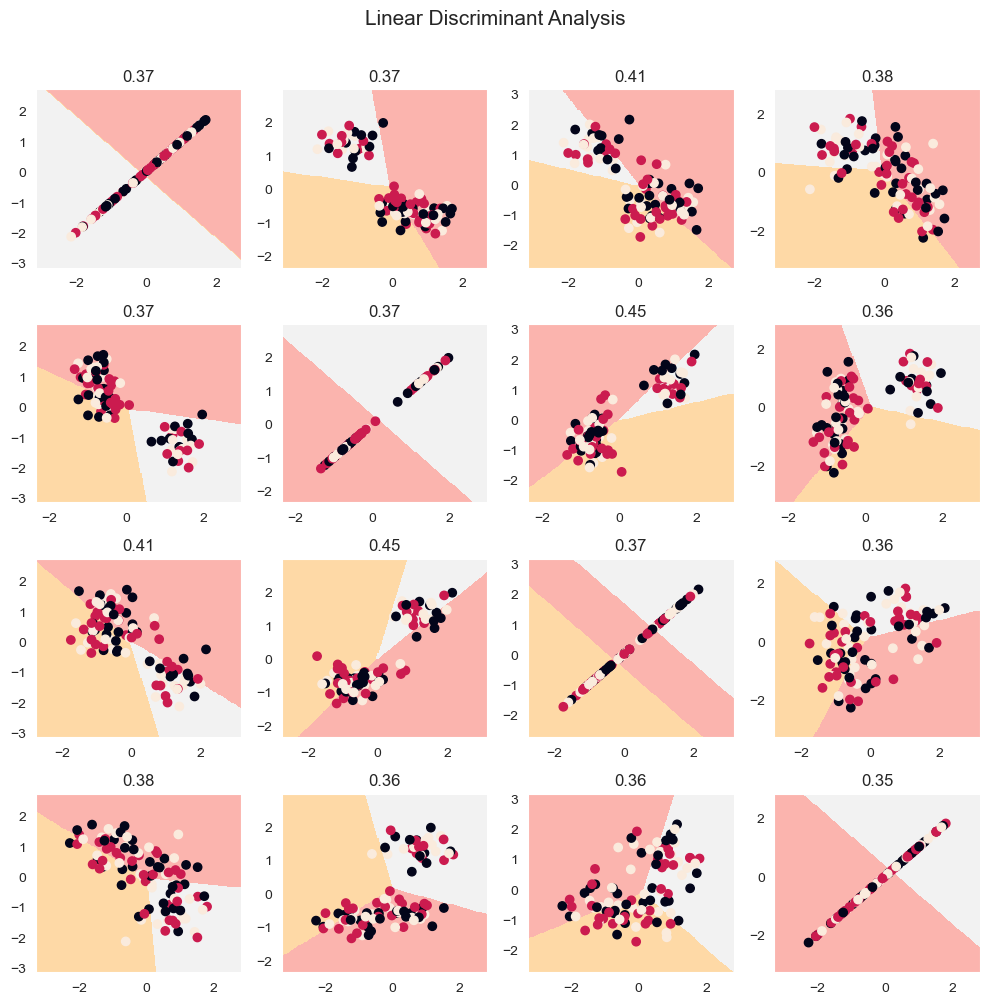

In [237]:
plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Linear Discriminant Analysis',y=1, fontsize=15)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        splot=lda_qda(i, j,lda(),k)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


# Выполним предыдущий пункт, используя модель квадратичного дискриминантного анализа

In [242]:
plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Quadratic Discriminant Analysis',y=0.98, fontsize=15)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        splot=lda_qda(i, j,qda(),k)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


ValueError: Length of values (100) does not match length of index (400)

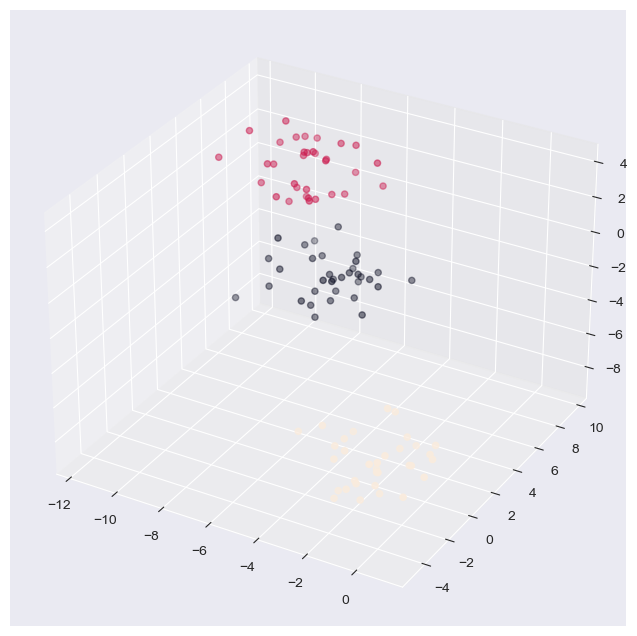

In [238]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
plt.show()

In [239]:
sc = StandardScaler()
del[df['Class']]
df_t = pd.DataFrame(sc.fit_transform(df))
df_t.describe()

,0,1
count,4.000000e+02,4.000000e+02
mean,1.221245e-17,3.830269e-17
std,1.001252e+00,1.001252e+00
min,-1.341641e+00,-1.619822e+00
25%,-6.708204e-01,-9.028606e-01
50%,0.000000e+00,-2.041339e-01
75%,6.708204e-01,9.058532e-01
max,1.341641e+00,1.961376e+00


In [240]:
import plotly.express as px
df = pd.DataFrame(X[:, 0:3])
fig= px.scatter_3d(df, x=0, y=1, z=2, color=y)
fig.show()

In [241]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import numpy as np

# Создаем данные
X = np.random.rand(100, 3)

# Задаем количество кластеров
n_clusters = 3

# Обучаем модель KMeans
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Получаем координаты кластерных центров
centers = kmeans.cluster_centers_

# Создаем scatter plot 3D с помощью Plotly Express
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2], color=kmeans.labels_)

# Добавляем кластерные центры
fig.add_scatter3d(x=centers[:,0], y=centers[:,1], z=centers[:,2], mode='markers', marker=dict(size=10, color='red'))

# Назначаем заголовок и метки осей
fig.update_layout(title='3D Scatter Plot with Cluster Centers', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

# Отображаем график
fig.show()